<a href="https://colab.research.google.com/github/fatimagamal/Dashboards/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Quality KPI For ALEX**

**CI NO:** CI1274

**Created by :** Fatma Gamal

**Created on :** 26/10/2025

This dashboard provides a full overview of Quality Control performance related to Purchase Orders (POs). It consolidates defect rates, first-time acceptance performance, and the classification of quality issues. The dashboard is divided into multiple visual sections, each offering a specific KPI or analytical insight.

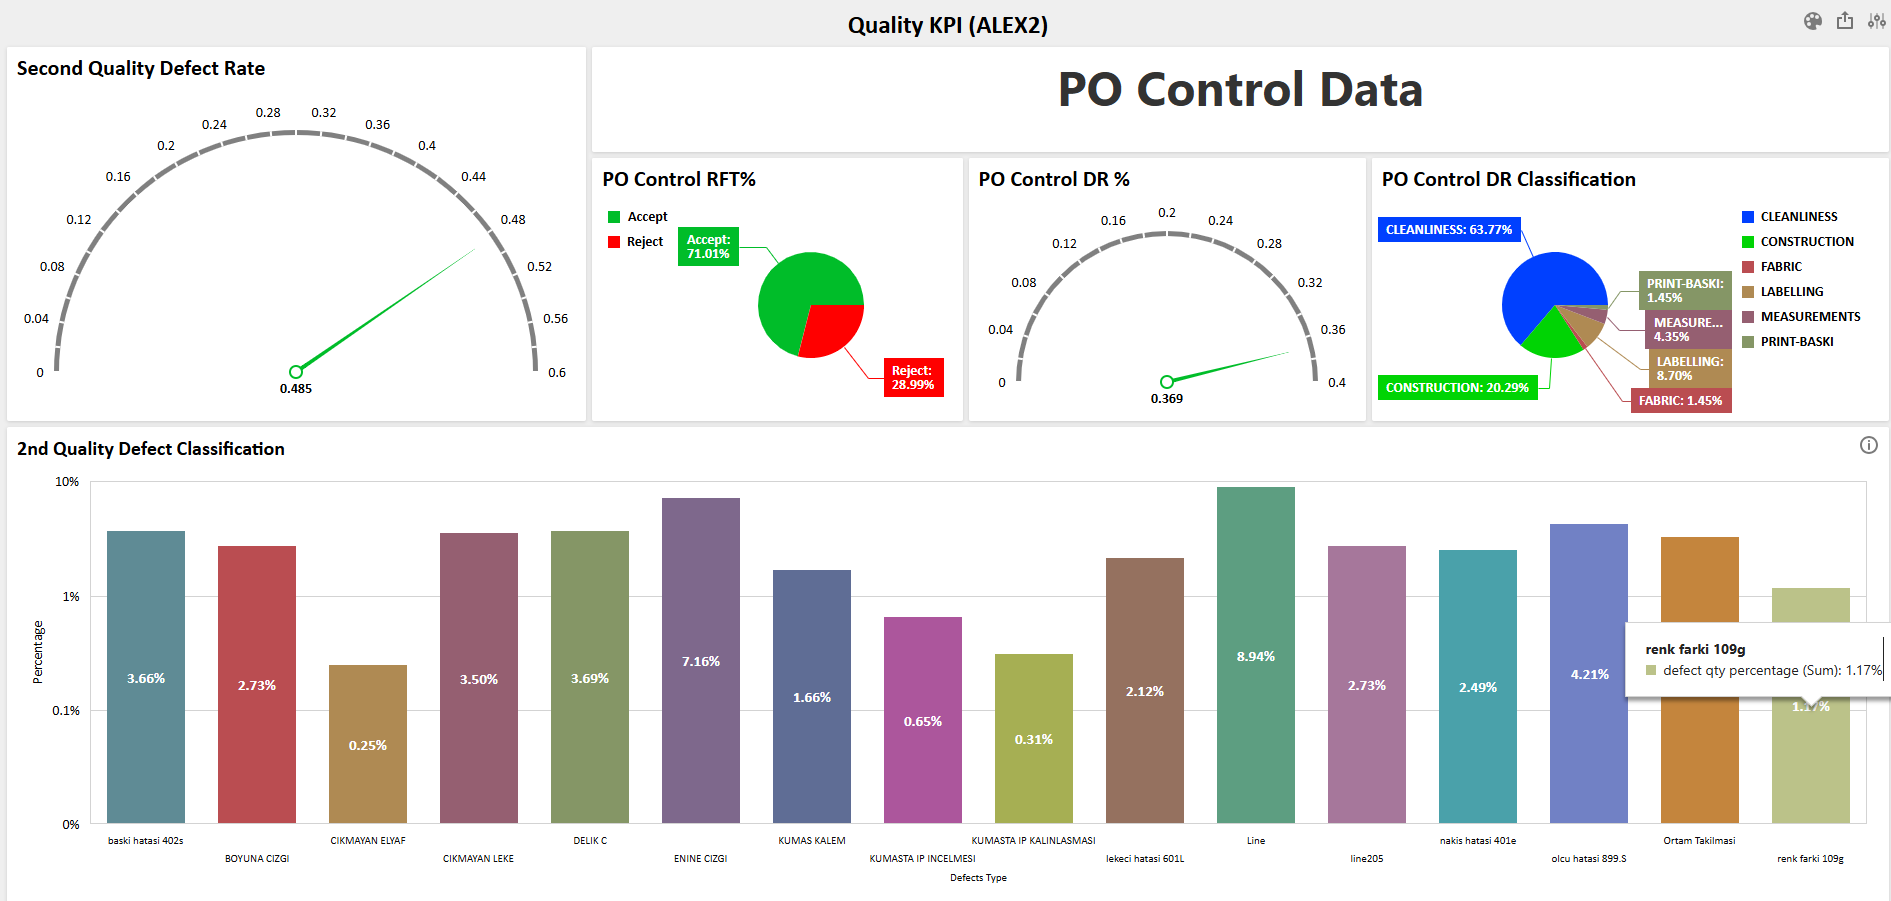

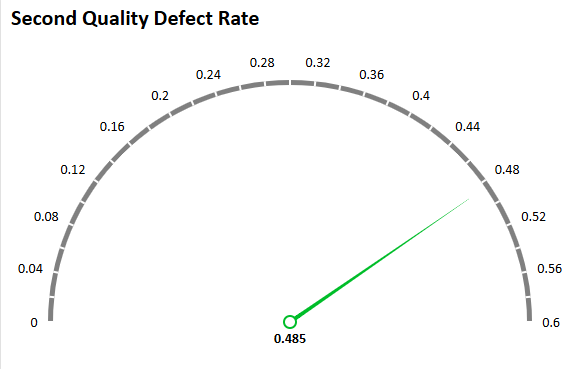

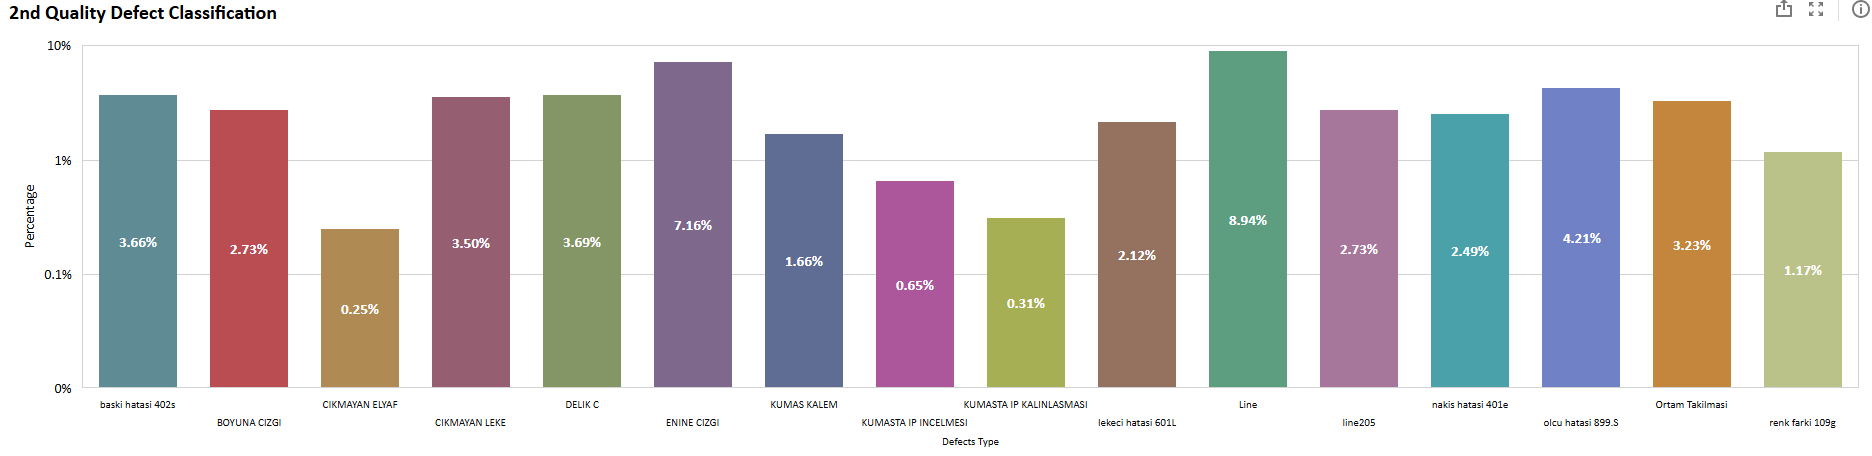

**Second Quality Defect Rate:** Shows the percentage of products that failed quality checks and were classified as “Second Quality.”

**2nd Quality Defect classification:** Detailed breakdown of specific defect types contributing to second-quality products.

In [ ]:
select
 T2.LD,
 CAST(T2.Total AS DECIMAL(18,2)) *100/ NULLIF(CAST(T1.TotalQty AS DECIMAL(18,2)), 0) 'defect qty percentage'

 from(
(SELECT
   sum( CAST(TT.Qty AS INT)  )                        AS Totalqty
FROM YNSALX01.xInv_Transactions_V AS TT WITH (NOLOCK)
JOIN YNSALX01.xInv_Lot AS L WITH (NOLOCK)
                                            ON TT.LotNumber = L.LotNumber AND TT.ItemID = L.ItemID
JOIN YNSALX01.xInv_Items AS IT WITH (NOLOCK)
    ON IT.ItemID = TT.ItemID
    AND TT.OrganizationID = IT.OrganizationID
    AND IT.Segment1 = '10'
JOIN YNSALX01.xMas_AllSize_V AS S WITH (NOLOCK)
    ON S.FlexValue = TT.SizeID
    AND S.Lang = 'EN'

WHERE
    TT.TransactionTypeID IN (7, 9)
    AND TT.Warehouse <> 'OUTSOURCE'
    AND TT.TransactionDate_Date BETWEEN @STARTDATE AND @FINISHDATE)
	)T1
	cross join

	(
SELECT

    QUDA.LD,

    SUM(
        CASE WHEN QUDA.LD = 'KUMASTA KACIK' THEN CAST(T.Qty AS INT) ELSE 0 END +
        CASE WHEN QUDA.LD = 'KUMASTA IP KALINLASMASI' THEN CAST(T.Qty AS INT) ELSE 0 END +
        CASE WHEN QUDA.LD = 'KUMASTA IP INCELMESI' THEN CAST(T.Qty AS INT) ELSE 0 END +
        CASE WHEN QUDA.LD = 'BASKI KUMAS  B' THEN CAST(T.Qty AS INT) ELSE 0 END +
        CASE WHEN QUDA.LD = 'BASKI KUMAS    C' THEN CAST(T.Qty AS INT) ELSE 0 END +
        CASE WHEN QUDA.LD = 'CIKMAYAN ELYAF' THEN CAST(T.Qty AS INT) ELSE 0 END +
        CASE WHEN QUDA.LD = 'ENINE CIZGI' THEN CAST(T.Qty AS INT) ELSE 0 END +
        CASE WHEN QUDA.LD = 'BOYUNA CIZGI' THEN CAST(T.Qty AS INT) ELSE 0 END +
        CASE WHEN QUDA.LD = 'METRAJ BASKI  HAT.' THEN CAST(T.Qty AS INT) ELSE 0 END +
        CASE WHEN QUDA.LD = 'CIKMAYAN LEKE' THEN CAST(T.Qty AS INT) ELSE 0 END +
        CASE WHEN QUDA.LD = 'DELIK C' THEN CAST(T.Qty AS INT) ELSE 0 END +
        CASE WHEN QUDA.LD = 'KUMAS KALEM' THEN CAST(T.Qty AS INT) ELSE 0 END +
        CASE WHEN QUDA.LD = 'Line' THEN CAST(T.Qty AS INT) ELSE 0 END +
        CASE WHEN QUDA.LD = 'line205' THEN CAST(T.Qty AS INT) ELSE 0 END +
        CASE WHEN QUDA.LD = 'olcu hatasi 899.S' THEN CAST(T.Qty AS INT) ELSE 0 END +
        CASE WHEN QUDA.LD = 'baski hatasi 402s' THEN CAST(T.Qty AS INT) ELSE 0 END +
        CASE WHEN QUDA.LD = 'renk farki 109g' THEN CAST(T.Qty AS INT) ELSE 0 END +
        CASE WHEN QUDA.LD = 'nakis hatasi 401e' THEN CAST(T.Qty AS INT) ELSE 0 END +
        CASE WHEN QUDA.LD = 'lekeci hatasi 601L' THEN CAST(T.Qty AS INT) ELSE 0 END +
        CASE WHEN QUDA.LD = 'Ortam Takilmasi' THEN CAST(T.Qty AS INT) ELSE 0 END +
        CASE WHEN QUDA.LD = 'Accessories Defect' THEN CAST(T.Qty AS INT) ELSE 0 END +
        CASE WHEN QUDA.LD = 'Metal Reject Defect' THEN CAST(T.Qty AS INT) ELSE 0 END
    ) AS [Total]


FROM
    YNSALX01.xInv_Transactions_V T (NOLOCK)
    INNER JOIN YNSALX01.xPa_Project P (NOLOCK) ON P.ProjectID = T.ProjectID
    INNER JOIN YNSALX01.xInv_Lot L (NOLOCK) ON L.LotNumber = T.LotNumber
    INNER JOIN YNSALX01.xInv_Items IT (NOLOCK) ON IT.ItemID = L.ItemID AND T.OrganizationID = IT.OrganizationID

    LEFT JOIN YNSALX01.xMas_AllSize_V S (NOLOCK) ON S.FlexValue = L.SizeID AND S.Lang = 'EN'

OUTER APPLY (
    SELECT top 1

        LD.[Desc] AS LD,        GD.Factory


  FROM YNSALX01.xInv_GarmentLotSecondQualityData GD (NOLOCK)
    LEFT JOIN YNSALX01.xMas_LovDetail LD (NOLOCK) ON LD.Value = GD.QualityReason AND LD.Lang = 'EN' AND LD.LovID = '2181'
    WHERE T.LotNumber = GD.LotNumber  AND CAST(GD.CreationDate AS DATE) = T.CreationDate_Date

) AS QUDA

WHERE
    T.TransactionTypeID IN ('1', '7') AND
    IT.Segment1 = 10 and

    T.Warehouse in ('HG_SecQ_2') AND
    T.TransferWarehouse IN ('HG_SecQ_2', 'G_MD_2', 'Pre_Ship_2') AND
    GC = '0' AND
    T.TransactionDate_Date BETWEEN  @STARTDATE AND @FINISHDATE
	AND     QUDA.Factory = 2

	group by QUDA.LD
)T2

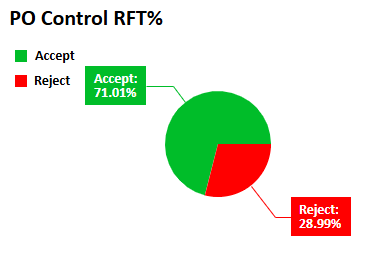

Shows the distribution of Purchase Orders that were accepted or rejected at first inspection.

In [ ]:
SELECT
	case when qh.Result=1 then SUM(line.ErrorSize)
	when qh.Result=2 then SUM(line.ErrorSize) end 'total',
	case when qh.Result=1 then 'Accept'
	 when qh.Result=2 then 'Reject'
	 end as 'Status'
     FROM YNSALX01.xQua_QualityAssuranceConfFinal qh (NOLOCK)
     INNER JOIN YNSALX01.xQua_QualityAssuranceConfFinalLine line (NOLOCK)
         ON line.HeaderID = qh.ID
     INNER JOIN YNSALX01.xQua_QualityAssuranceConfErrorList el (NOLOCK)
         ON line.ErrorCode = el.ID
     WHERE qh.InspectionDate BETWEEN  @STARTDATE AND @FINISHDATE
       AND qh.Factory = 2
       AND qh.Final = 1
	    AND qh.InspectionControlType = 1
	group by qh.Result

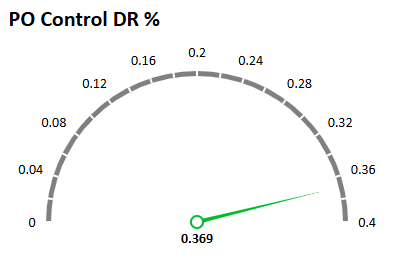

Displays the defect rate specifically for Purchase Orders.

SELECT
  cast (sum(line.ErrorSize)  as decimal (18,2))*100/
	(SELECT
cast(sum(SampleSize) as decimal (18,2))
         FROM
		 	 YNSALX01.xQua_QualityAssuranceConfFinal qh (NOLOCK)

              WHERE
	qh.InspectionDate  BETWEEN  @STARTDATE AND  @FINISHDATE
	AND qh.Final = 1
		 AND   qh.Type = 1
        AND qh.Factory = 2
	    AND qh.InspectionControlType = 1
			and qh.Result=1)

         FROM

		 	 	 YNSALX01.xQua_QualityAssuranceConfFinal qh (NOLOCK)
		 INNER JOIN YNSALX01.xQua_QualityAssuranceConfFinalLine line (nolock)  ON   line.HeaderID=qh.ID
         inner join YNSALX01.xQua_QualityAssuranceConfErrorList el (NOLOCK) on line.ErrorCode=el.ID

WHERE
    qh.InspectionDate BETWEEN @STARTDATE AND @FINISHDATE
    AND qh.Final = 1
    AND qh.Type = 1
    AND qh.Factory = 2
    AND qh.InspectionControlType = 1
	and qh.Result=1

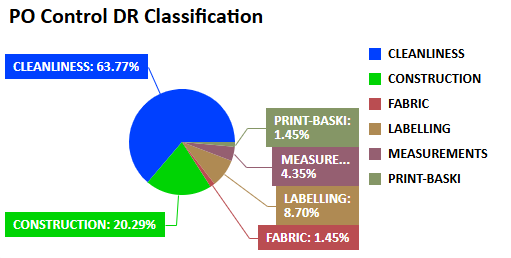

Breaks down the defect rate into main classification categories, helping to identify root causes.

SELECT

    CASE
        WHEN UPPER(el.Title) IN ('CONSTRUCTION', 'CONSTRUCTİON') THEN 'CONSTRUCTION'
        WHEN UPPER(el.Title) IN ('FABRIC') THEN 'FABRIC'
        WHEN UPPER(el.Title) IN ('TRIMS', 'TRIM') THEN 'TRIMS'
        WHEN UPPER(el.Title) IN ('EMBELLISHMENT') THEN 'EMBELLISHMENT'
        WHEN UPPER(el.Title) IN ('LABELLING', 'LABEL') THEN 'LABELLING'
        WHEN UPPER(el.Title) IN ('CLEANLINESS') THEN 'CLEANLINESS'
        WHEN UPPER(el.Title) IN ('PACKING ACCURACY', 'PACKAGING') THEN 'PACKING ACCURACY'
        WHEN UPPER(el.Title) IN ('MEASUREMENTS', 'MEASUREMENT') THEN 'MEASUREMENTS'
        WHEN UPPER(el.Title) IN ('REGULATORY&SAFETY', 'REGULATORY & SAFETY') THEN 'REGULATORY&SAFETY'
        ELSE UPPER(el.Title)
    END AS DefectName,

   cast ( SUM(line.ErrorSize) as Decimal (18,2) )*100 /(SELECT
							    cast( sum(SampleSize) as decimal (18,2))
									 FROM
		 								 YNSALX01.xQua_QualityAssuranceConfFinal qh (NOLOCK)

										  WHERE
								qh.InspectionDate between @STARTDATE AND @FINISHDATE
								AND qh.Final = 1
									 AND   qh.Type = 1
									AND qh.Factory = 2
									AND qh.InspectionControlType = 1)   AS TotalErrorSize
FROM
    YNSALX01.xQua_QualityAssuranceConfFinal qh (NOLOCK)
    INNER JOIN YNSALX01.xQua_QualityAssuranceConfFinalLine line (NOLOCK)
        ON line.HeaderID = qh.ID
    INNER JOIN YNSALX01.xQua_QualityAssuranceConfErrorList el (NOLOCK)
        ON line.ErrorCode = el.ID
WHERE
    qh.InspectionDate BETWEEN @STARTDATE AND @FINISHDATE
    AND qh.Final = 1
    AND qh.Type = 1
    AND qh.Factory = 2
    AND qh.InspectionControlType = 1
GROUP BY
    CASE
        WHEN UPPER(el.Title) IN ('CONSTRUCTION', 'CONSTRUCTİON') THEN 'CONSTRUCTION'
        WHEN UPPER(el.Title) IN ('FABRIC') THEN 'FABRIC'
        WHEN UPPER(el.Title) IN ('TRIMS', 'TRIM') THEN 'TRIMS'
        WHEN UPPER(el.Title) IN ('EMBELLISHMENT') THEN 'EMBELLISHMENT'
        WHEN UPPER(el.Title) IN ('LABELLING', 'LABEL') THEN 'LABELLING'
        WHEN UPPER(el.Title) IN ('CLEANLINESS') THEN 'CLEANLINESS'
        WHEN UPPER(el.Title) IN ('PACKING ACCURACY', 'PACKAGING') THEN 'PACKING ACCURACY'
        WHEN UPPER(el.Title) IN ('MEASUREMENTS', 'MEASUREMENT') THEN 'MEASUREMENTS'
        WHEN UPPER(el.Title) IN ('REGULATORY&SAFETY', 'REGULATORY & SAFETY') THEN 'REGULATORY&SAFETY'
        ELSE UPPER(el.Title)
    END
ORDER BY
    TotalErrorSize DESC;